## Code for homework #1


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Helper functions for plotting and drawing lines

In [3]:
def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

In [4]:
def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

Read and plot data

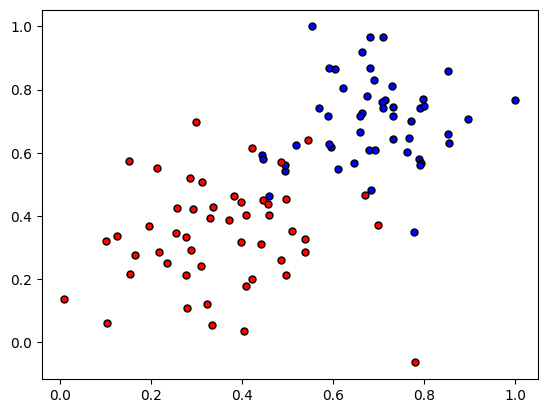

In [5]:
data = pd.read_csv('/content/drive/MyDrive/pytorch/data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

In [6]:
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(11)

In [7]:
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

In [8]:
def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

**TODO**: Fill in the code below to implement the perceptron trick.<br> <br>
The function should receive as inputs the data X, the labels y, the weights W (as an array), and the bias b.<br>
Update the weights W and bias b, according to the perceptron algorithm, and return W and b.

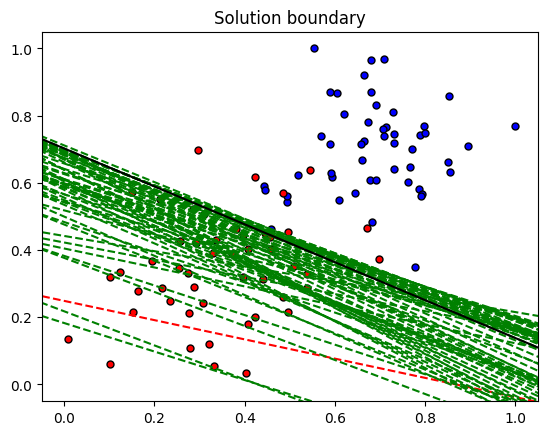

[(array([-0.28626045]), array([0.2487442])),
 (array([-0.50707649]), array([0.21770308])),
 (array([-0.42395374]), array([0.18278189])),
 (array([-0.22646081]), array([0.44200254])),
 (array([-0.25541779]), array([0.42251146])),
 (array([-0.28192878]), array([0.40466678])),
 (array([-0.4401697]), array([0.38265024])),
 (array([-0.50606294]), array([0.37662144])),
 (array([-0.45483419]), array([0.62922083])),
 (array([-0.43938435]), array([0.60872082])),
 (array([-0.42490946]), array([0.58951444])),
 (array([-0.40424366]), array([0.56572124])),
 (array([-0.38518131]), array([0.54377414])),
 (array([-0.35393629]), array([0.518139])),
 (array([-0.44882011]), array([0.48342165])),
 (array([-0.58333805]), array([0.49955826])),
 (array([-0.53943297]), array([0.47594796])),
 (array([-0.50264638]), array([0.69225152])),
 (array([-0.47978512]), array([0.67448478])),
 (array([-0.45806797]), array([0.6576072])),
 (array([-0.43741114]), array([0.64155366])),
 (array([-0.42632052]), array([0.625977

In [9]:
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i], W, b)
        if y[i] == 1 and y_hat == 0:  # If the point is positive but we thought it was negative
            b += learn_rate  # Be more positive next time
            for j in range(len(W)):  # For each weight
                W[j] += learn_rate * X[i][j]  # Adjust it upwards
        elif y[i] == 0 and y_hat == 1:  # If the point is negative but we thought it was positive
            b -= learn_rate  # Be less positive next time
            for j in range(len(W)):  # For each weight
                W[j] -= learn_rate * X[i][j]  # Adjust it downwards
    return W, b





# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.1, num_epochs = 65):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] # + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
        if i==0:
            display(-W[0]/W[1], -b/W[1], 'r--')
        else:
            display(-W[0]/W[1], -b/W[1])

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-W[0]/W[1], -b/W[1], 'black')

    # Plotting the data
    plot_points(X, y)
    plt.show()
    return boundary_lines

trainPerceptronAlgorithm(X, y)